<a href="https://colab.research.google.com/github/gigeon/coding-study/blob/master/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [152]:
import numpy as np
rng = np.random

In [153]:
#파라메터 설정
learning_rate = 0.001 #0.01씩 값 변환해 경사하강법시 답 구함
training_steps = 1000 #1000번 시도
display_step = 50 #결과 50마다 표현

In [154]:
#학습
x = np.array([16.4,16.8,17.6,18.6,19.0])
y = np.array([15.7,16.0,16.5,17.3,18.0])
n_samples = x.shape[0]

In [155]:
#wb설정
w = tf.Variable(rng.randn(), name='weight')
b = tf.Variable(rng.randn(), name='bias')

In [156]:
#Linear regression(wx+b)
def linear_regression(x):
  return w * x + b

In [157]:
#coat

def mean_square(y_pred, y_true):
  return tf.reduce_sum(tf.pow(y_pred-y_true, 2)) / (2* n_samples)

In [158]:
#경사하강법
optimizer = tf.optimizers.SGD(learning_rate)

In [159]:
#optimizer
def run_optimization():
  #wrap computation inside a gradientape for automatic differentiation
  with tf.GradientTape() as g:
    pred = linear_regression(x)
    loss = mean_square(pred, y)

  gradients = g.gradient(loss,[w,b])

  optimizer.apply_gradients(zip(gradients,[w,b]))


In [160]:
#학습
for step in range(1, training_steps + 1):
  #run the optimization to update w and b values
  run_optimization()
  if step % display_step == 0:
    pred = linear_regression(x)
    loss = mean_square(pred, y)
    print("step: %i, loss: %f,w: %f, b: %f" % (step, loss, w.numpy(), b.numpy()))

step: 50, loss: 0.010386,w: 0.885058, b: 1.049332
step: 100, loss: 0.010386,w: 0.885050, b: 1.049475
step: 150, loss: 0.010385,w: 0.885042, b: 1.049618
step: 200, loss: 0.010385,w: 0.885034, b: 1.049761
step: 250, loss: 0.010385,w: 0.885026, b: 1.049904
step: 300, loss: 0.010384,w: 0.885017, b: 1.050047
step: 350, loss: 0.010384,w: 0.885009, b: 1.050190
step: 400, loss: 0.010383,w: 0.885001, b: 1.050333
step: 450, loss: 0.010383,w: 0.884993, b: 1.050476
step: 500, loss: 0.010383,w: 0.884985, b: 1.050619
step: 550, loss: 0.010382,w: 0.884977, b: 1.050763
step: 600, loss: 0.010382,w: 0.884969, b: 1.050906
step: 650, loss: 0.010381,w: 0.884961, b: 1.051049
step: 700, loss: 0.010381,w: 0.884953, b: 1.051192
step: 750, loss: 0.010380,w: 0.884945, b: 1.051335
step: 800, loss: 0.010380,w: 0.884937, b: 1.051478
step: 850, loss: 0.010380,w: 0.884929, b: 1.051621
step: 900, loss: 0.010379,w: 0.884921, b: 1.051764
step: 950, loss: 0.010379,w: 0.884913, b: 1.051907
step: 1000, loss: 0.010378,w: 0.

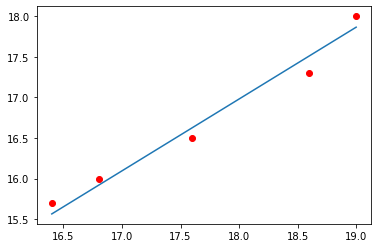

In [161]:
import matplotlib.pyplot as plt
plt.plot(x,y,'ro',label='original data')
plt.plot(x, np.array(w*x+b), label='fitted line')
plt.legend
plt.show()